In [17]:
import pandas as pd

In [18]:
df = pd.read_csv("./inputs/train.csv").set_index("id")
df

,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
id,,,,,,,,
0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,female,38,166.0,61.0,25.0,102.0,40.6,146.0
...,...,...,...,...,...,...,...,...
749995,male,28,193.0,97.0,30.0,114.0,40.9,230.0
749996,female,64,165.0,63.0,18.0,92.0,40.5,96.0
749997,male,60,162.0,67.0,29.0,113.0,40.9,221.0


In [19]:
# Missing Values
df.isnull().sum()

Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [20]:
# Unique Values
for column in df.columns:
    print(column, len(df[column].unique()))

Sex 2
Age 60
Height 86
Weight 91
Duration 30
Heart_Rate 63
Body_Temp 75
Calories 277


In [21]:
# Filtering the Categorical and Non-Categorical columns
categories = df.select_dtypes(include=object).columns
non_categories = df.select_dtypes(include=["number"]).columns[:-1]


display(categories)
display(non_categories)

Index(['Sex'], dtype='object')

Index(['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp'], dtype='object')

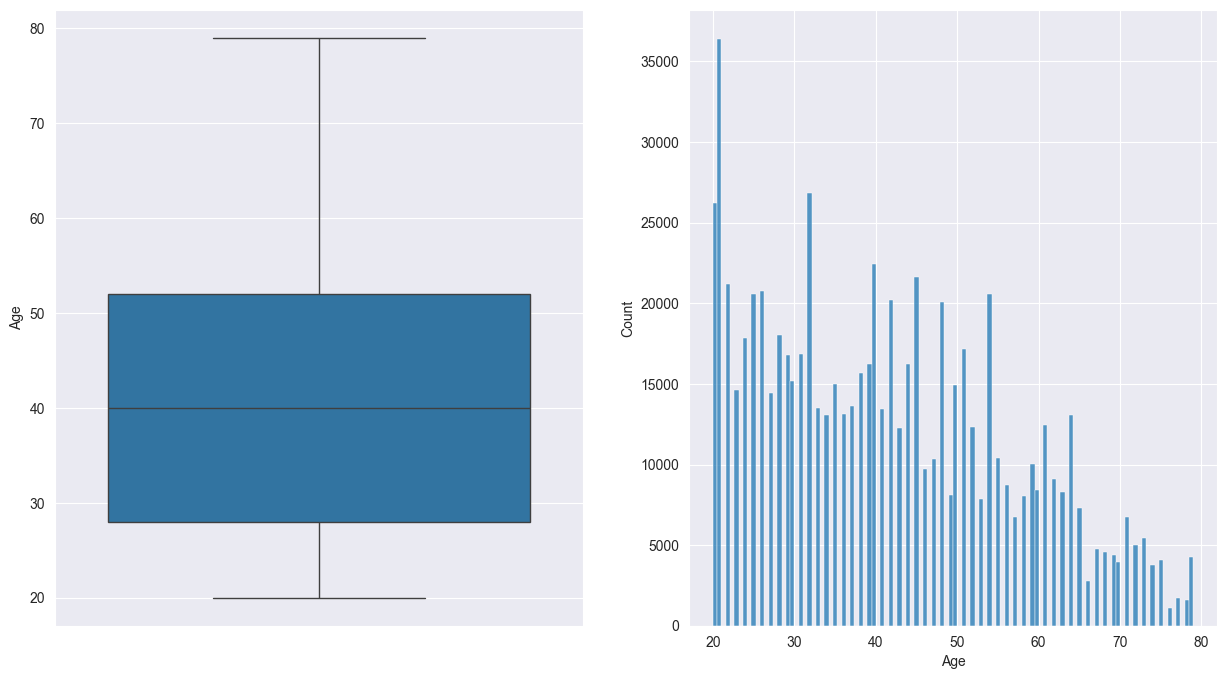

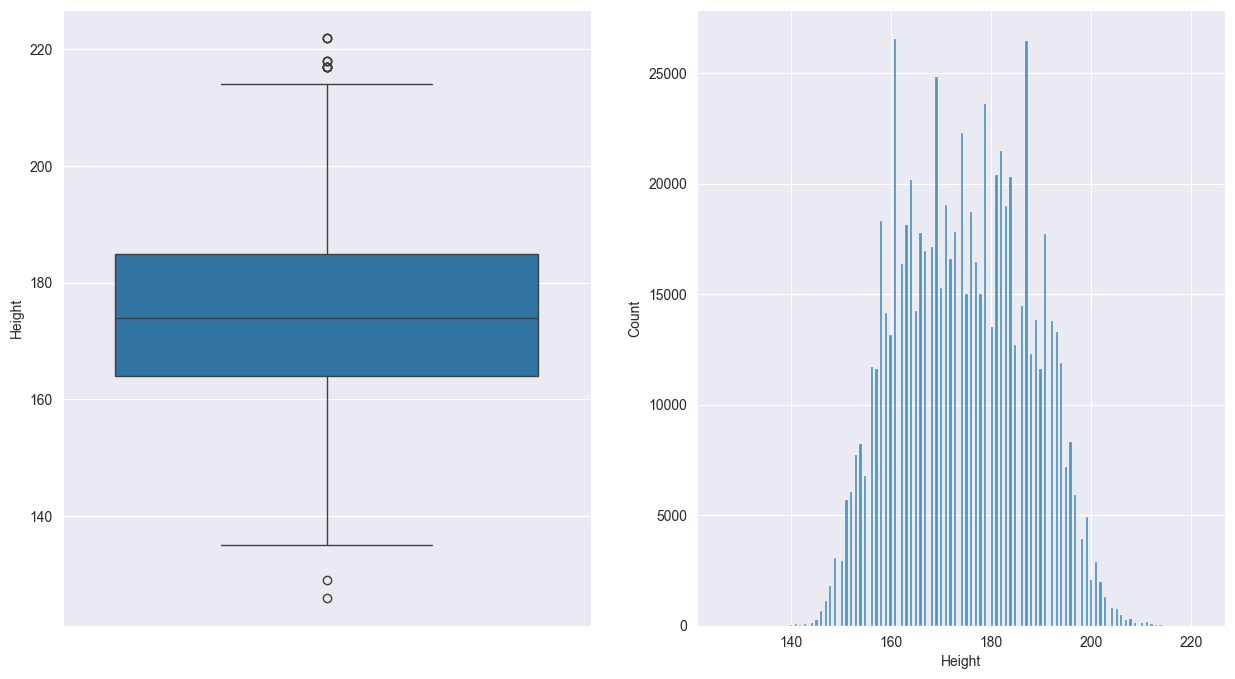

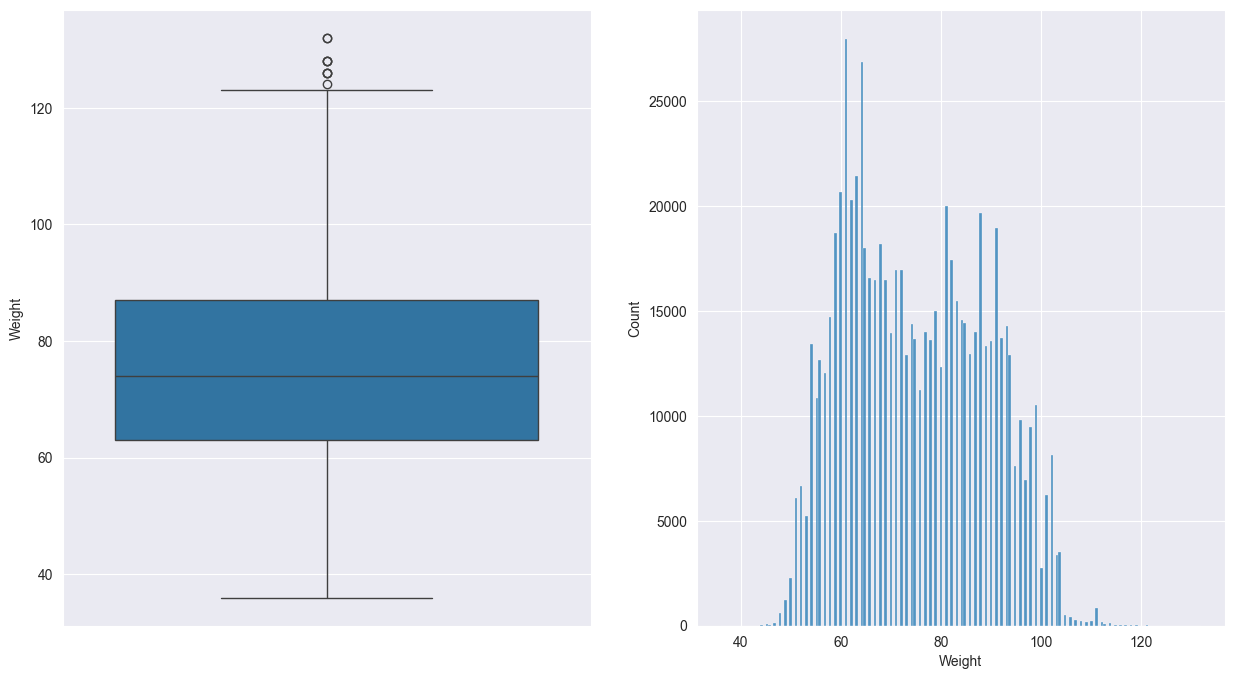

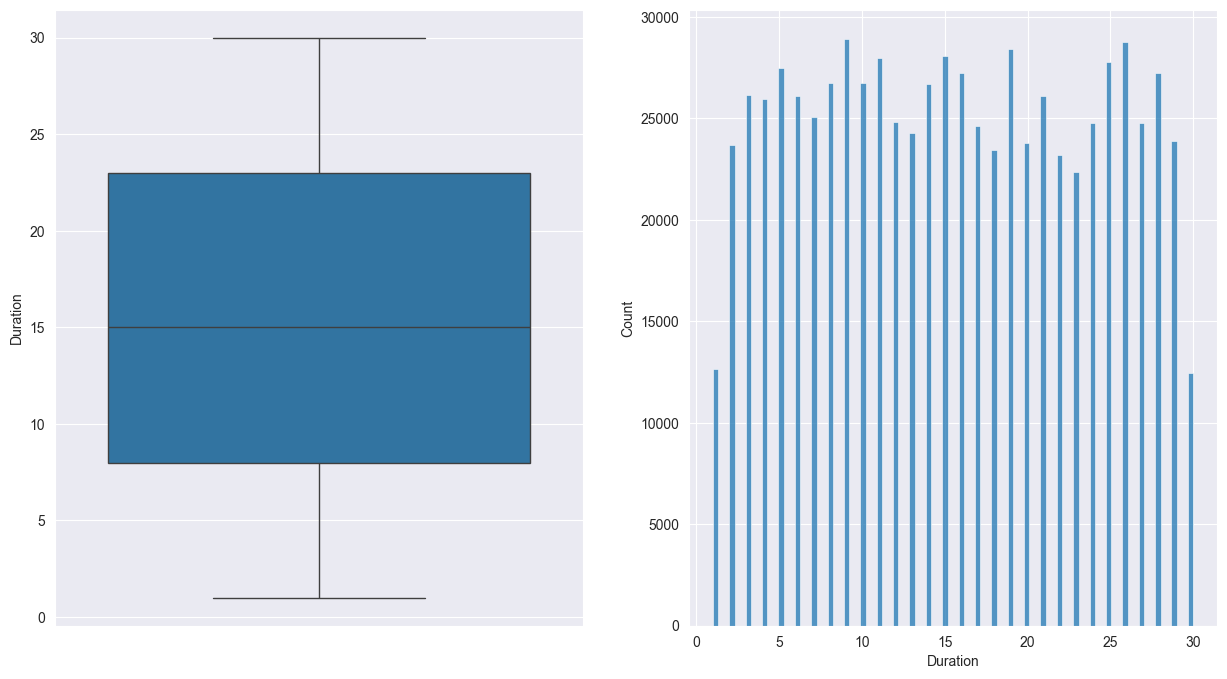

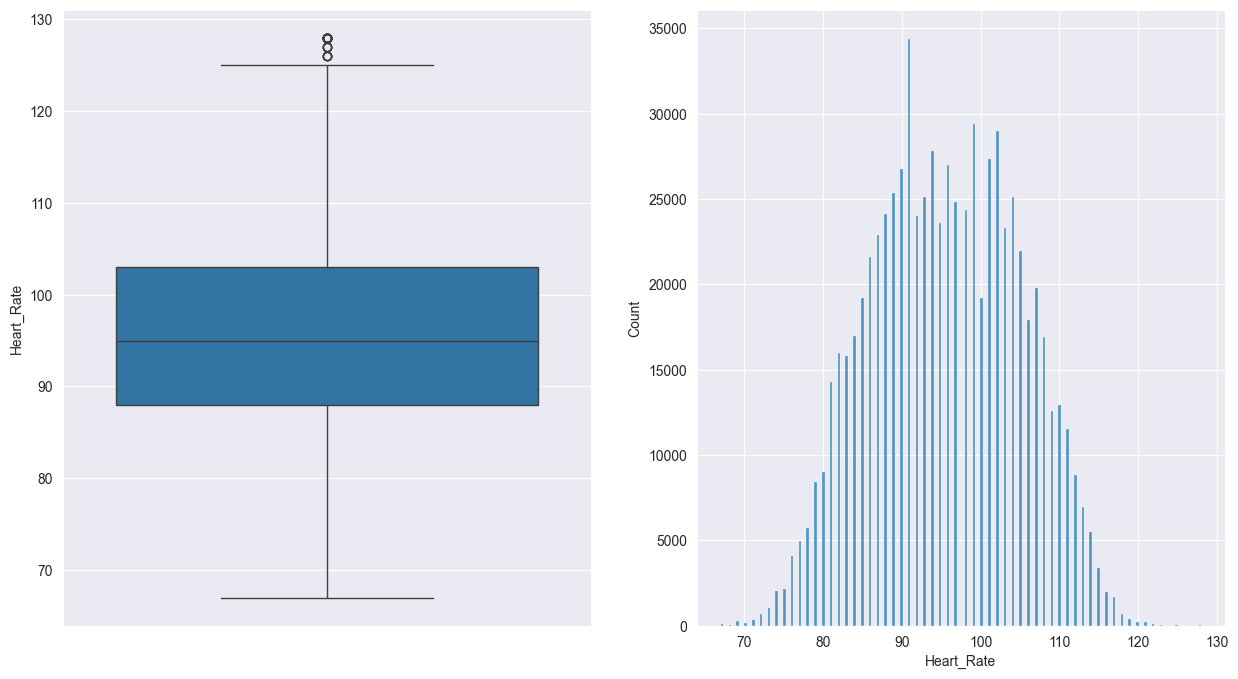

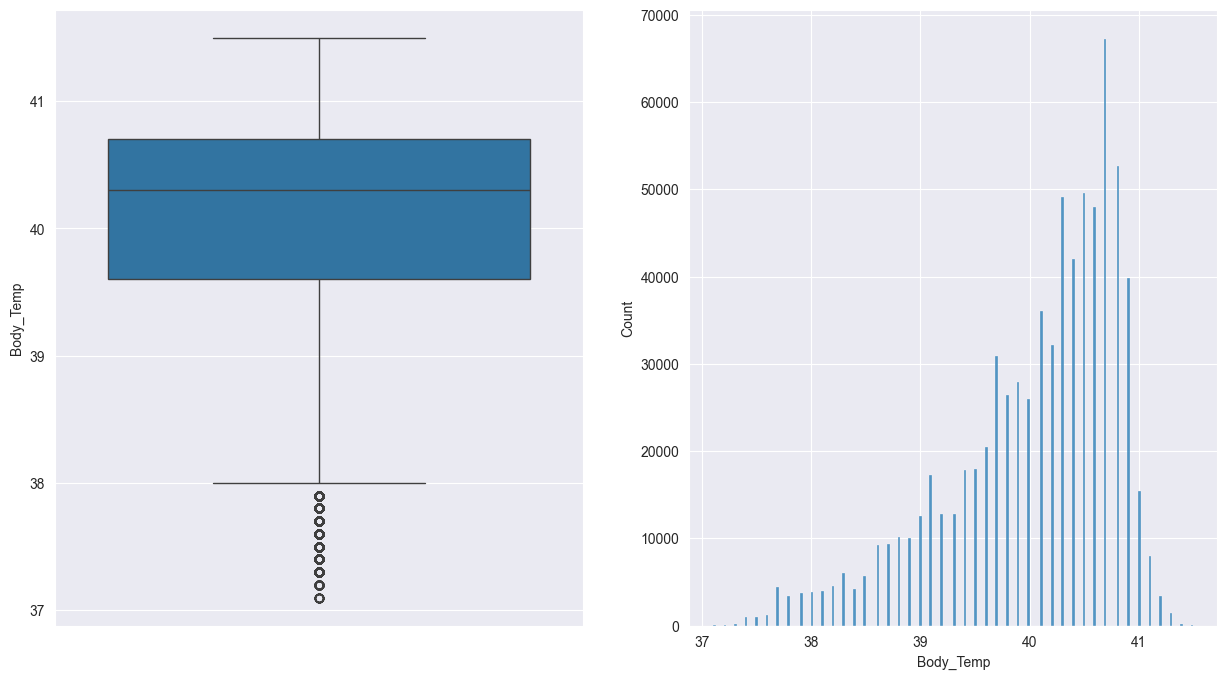

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

for column in non_categories:
    plt.figure(figsize=(15, 8))
    plt.subplot(1, 2, 1)
    sns.boxplot(data=df, y=column, )
    plt.subplot(1, 2, 2)
    sns.histplot(data=df, x=column, kde=False)
    plt.show()

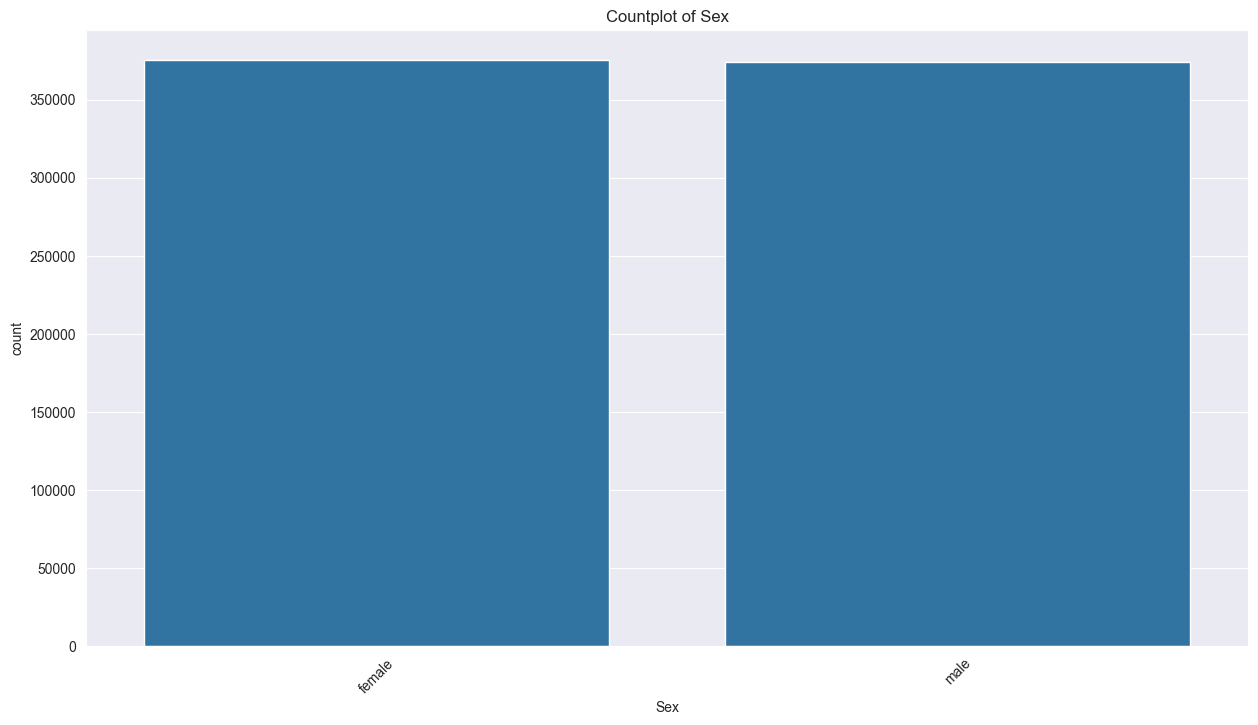

In [23]:
for column in categories:
    plt.figure(figsize=(15, 8))
    sns.countplot(data=df, x=column, order=df[column].value_counts().index)
    plt.title(f'Countplot of {column}')
    plt.xticks(rotation=45)
    plt.show()

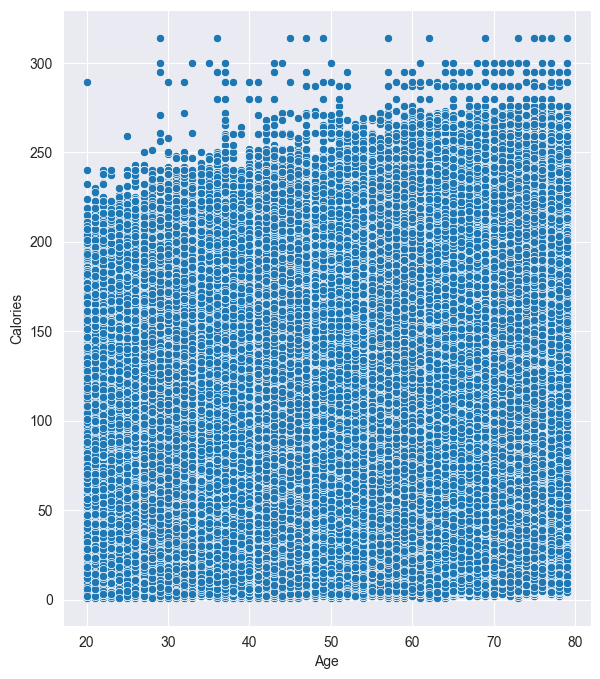

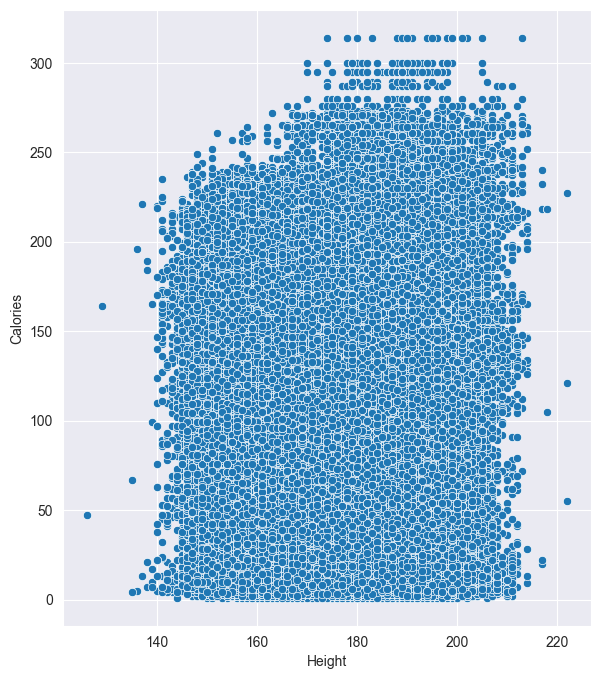

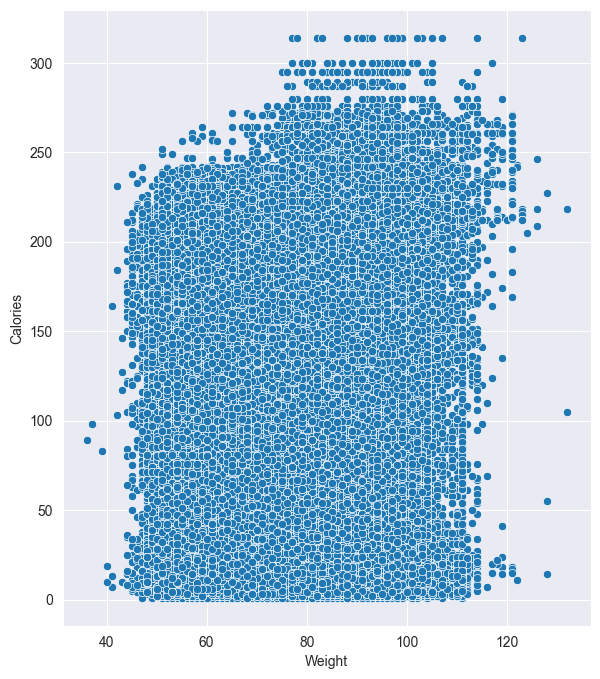

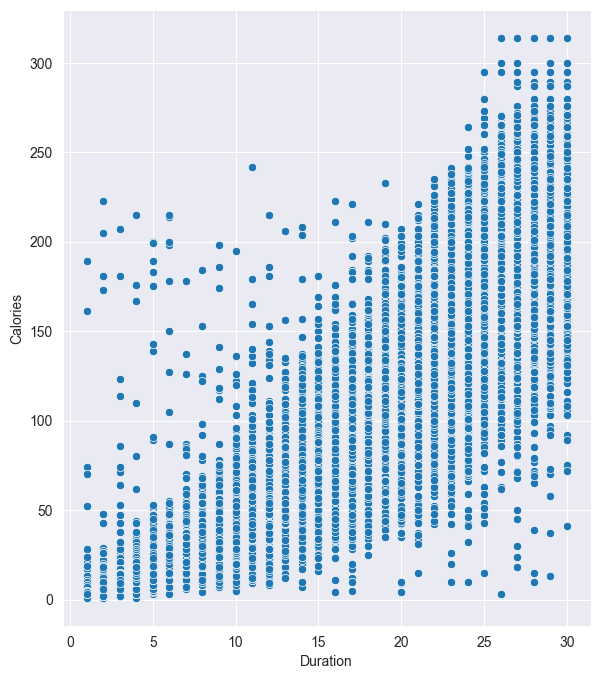

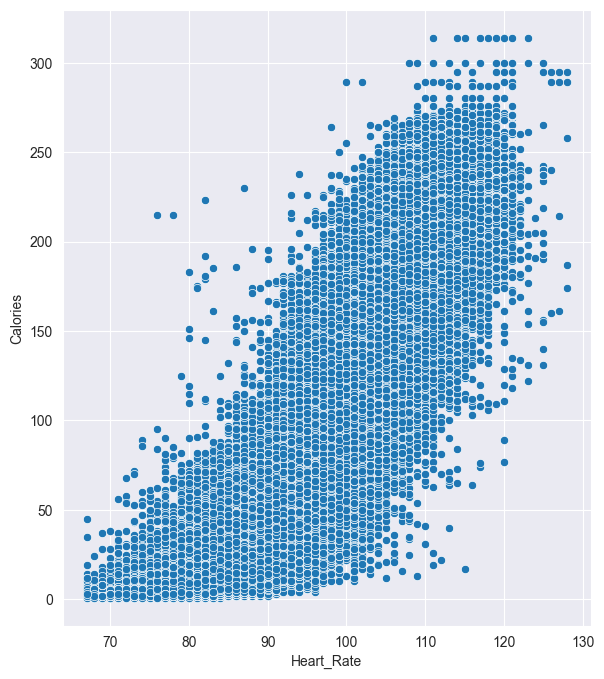

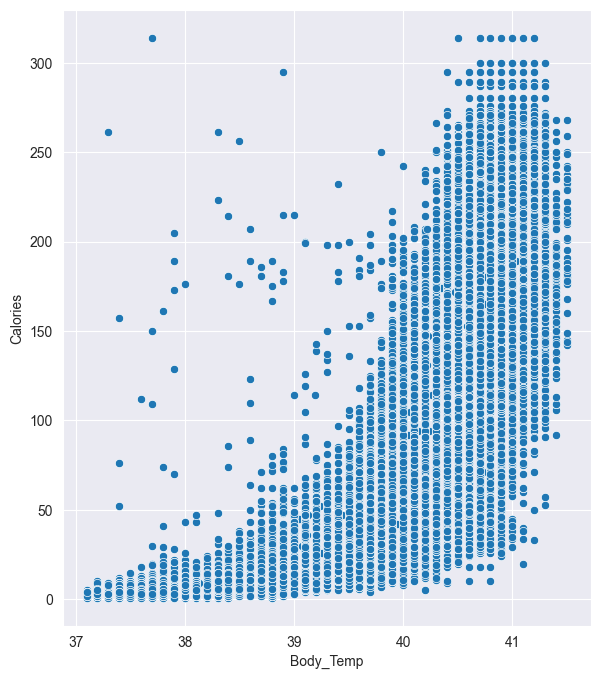

In [24]:
for column in non_categories:
    plt.figure(figsize=(15, 8))
    plt.subplot(1, 2, 1)
    sns.scatterplot(data=df, x=column, y=df["Calories"])
    plt.show()

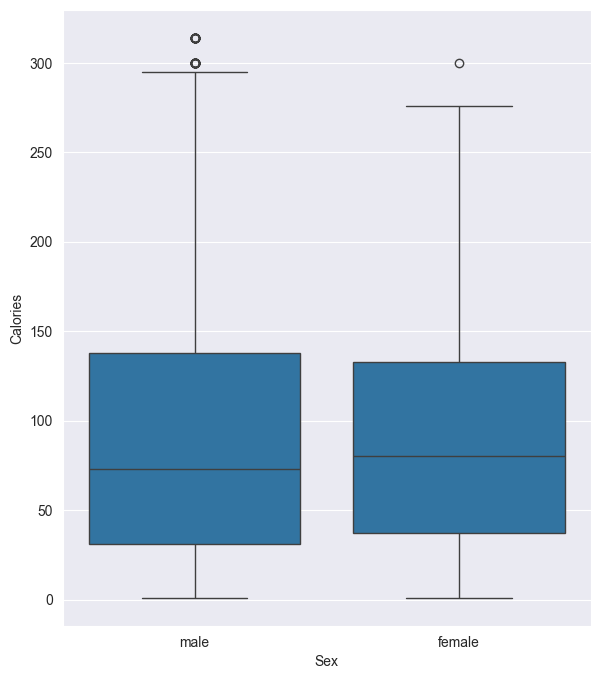

In [25]:
for column in categories:
    plt.figure(figsize=(15, 8))
    plt.subplot(1, 2, 1)
    sns.boxplot(data=df, x=column, y=df["Calories"])
    plt.show()

In [ ]:
sns.pairplot(data=df, hue="Calories")

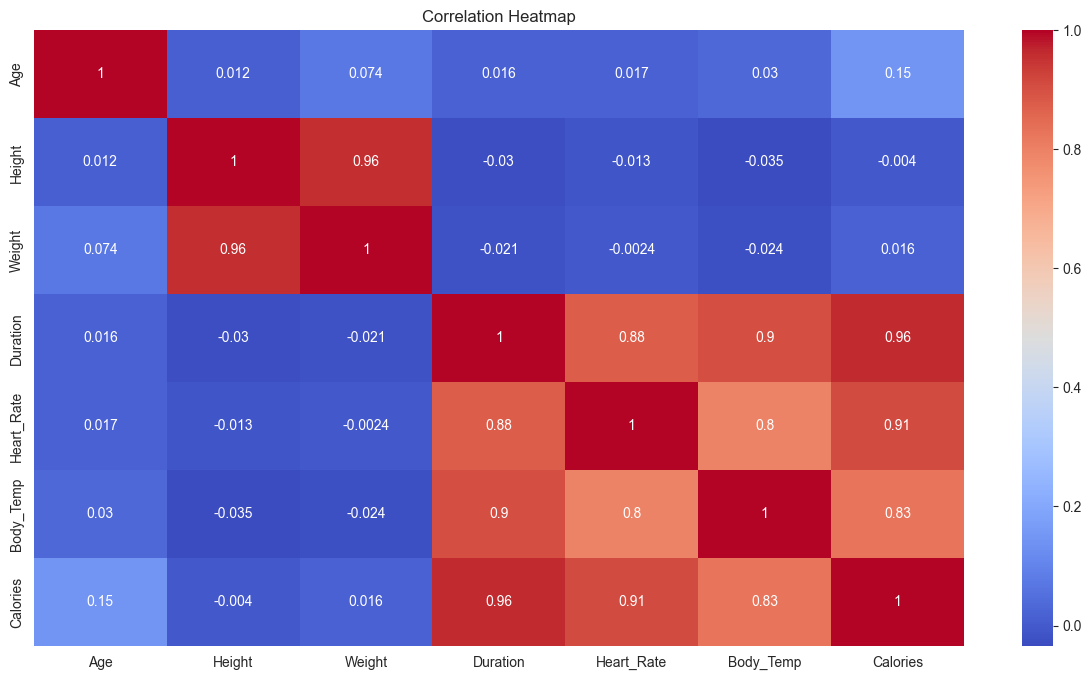

In [26]:
numeric_df = df.select_dtypes(include=["number"])
plt.figure(figsize=(15, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Feature - Target Correlation:

Duration      0.959908
Heart_Rate    0.908748
Body_Temp     0.828671
Age           0.145683
Weight        0.015863
Height       -0.004026
Name: Calories, dtype: float64


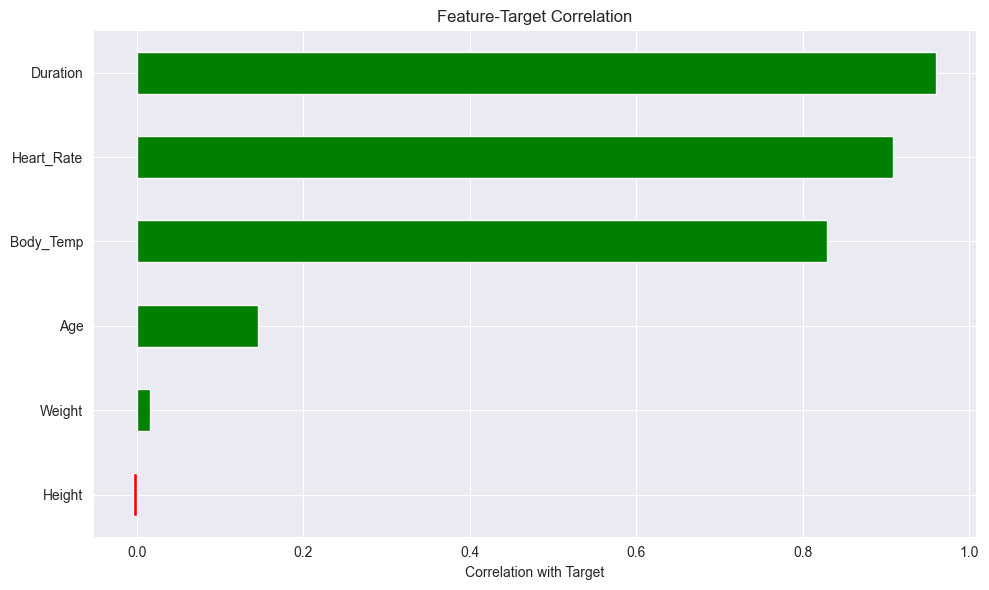

In [27]:
target_col = "Calories"

# 2. Drop rows with missing target values
numeric_df = numeric_df.dropna(subset=[target_col])

# 3. Calculate correlation of all features with the target
correlation_with_target = numeric_df.corr()[target_col].drop(target_col)

# 4. Sort by absolute correlation value (strongest at top)
sorted_corr = correlation_with_target.reindex(correlation_with_target.abs().sort_values(ascending=False).index)

# 5. Display the results
print("Feature - Target Correlation:\n")
print(sorted_corr)

# 6. Optional: Visualize as horizontal bar plot
plt.figure(figsize=(10, 6))
sorted_corr.plot(kind='barh', color=sorted_corr.apply(lambda x: 'green' if x > 0 else 'red'))
plt.xlabel('Correlation with Target')
plt.title('Feature-Target Correlation')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [28]:
%store categories
%store non_categories

Stored 'categories' (Index)
Stored 'non_categories' (Index)


In [29]:
# Label Encoding for categorical data
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for column in categories:
    encoder.fit(df[column])
    df[column] = encoder.transform(df[column])

df[categories]

,Sex
id,
0,1
1,0
2,0
3,1
4,0
...,...
749995,1
749996,0
749997,1


In [30]:
# Scaling non-categorical data
from sklearn.preprocessing import StandardScaler,RobustScaler

scaler = RobustScaler()
df[non_categories] = scaler.fit_transform(df[non_categories])
df[non_categories]

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
id,,,,,,
0,-0.166667,0.714286,0.333333,0.733333,0.400000,0.636364
1,1.000000,-0.523810,-0.583333,-0.466667,-0.666667,-0.545455
2,0.458333,-0.619048,-0.416667,-0.533333,-0.733333,-0.454545
3,-0.833333,0.857143,0.666667,0.666667,0.666667,0.363636
4,-0.083333,-0.380952,-0.541667,0.666667,0.466667,0.272727
...,...,...,...,...,...,...
749995,-0.500000,0.904762,0.958333,1.000000,1.266667,0.545455
749996,1.000000,-0.428571,-0.458333,0.200000,-0.200000,0.181818
749997,0.833333,-0.571429,-0.291667,0.933333,1.200000,0.545455


In [31]:
%store df
df

Stored 'df' (DataFrame)


,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
id,,,,,,,,
0,1,-0.166667,0.714286,0.333333,0.733333,0.400000,0.636364,150.0
1,0,1.000000,-0.523810,-0.583333,-0.466667,-0.666667,-0.545455,34.0
2,0,0.458333,-0.619048,-0.416667,-0.533333,-0.733333,-0.454545,29.0
3,1,-0.833333,0.857143,0.666667,0.666667,0.666667,0.363636,140.0
4,0,-0.083333,-0.380952,-0.541667,0.666667,0.466667,0.272727,146.0
...,...,...,...,...,...,...,...,...
749995,1,-0.500000,0.904762,0.958333,1.000000,1.266667,0.545455,230.0
749996,0,1.000000,-0.428571,-0.458333,0.200000,-0.200000,0.181818,96.0
749997,1,0.833333,-0.571429,-0.291667,0.933333,1.200000,0.545455,221.0


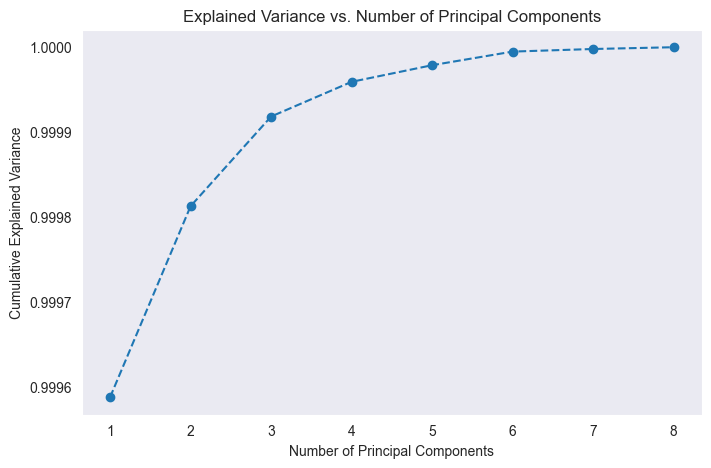

Explained Variance Ratios: [9.99588137e-01 2.24825608e-04 1.05493721e-04 4.08406560e-05
 1.95469379e-05 1.60208713e-05 3.04887468e-06 2.08656379e-06]
Cumulative Variance: [0.99958814 0.99981296 0.99991846 0.9999593  0.99997884 0.99999486
 0.99999791 1.        ]


In [32]:
# Principal Component Analysis of the data
from sklearn.decomposition import PCA
import numpy as np

pca = PCA()

pca.fit_transform(df)

# Explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs. Number of Principal Components")
plt.grid()
plt.show()

# Print explained variance ratios
print("Explained Variance Ratios:", explained_variance)
print("Cumulative Variance:", cumulative_variance)